In [4]:
import os
import pickle
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
evals_path = "/mnt/data/Odysseas/Validation_Eval"
precisions_dicts = []
recalls_dicts = []
for root, subfolders, files in os.walk(evals_path):
    if "weighted" in root:
            continue
    elif "YOLOV7" in root:
        continue
    for file in files:
        if file.startswith("precision") and file.endswith(".pkl"):
            precision_paths = os.path.join(root, file)
            precisions_dicts.append(precision_paths)
        elif file.startswith("recall") and file.endswith(".pkl"):
            recall_paths = os.path.join(root, file)
            recalls_dicts.append(recall_paths)

In [10]:
datasets = ["COCO", "FES", "ICARUS"]
pr_keep = {dataset:[] for dataset in datasets}
re_keep = {dataset:[] for dataset in datasets}
for pkl_precision, pkl_recall in zip(precisions_dicts, recalls_dicts):
    pr_file = open(pkl_precision, "rb")
    re_file = open(pkl_recall, "rb")
    pr_dict = pickle.load(pr_file)
    re_dict = pickle.load(re_file)
    pr_file.close()
    re_file.close()
    for dataset in datasets:
        split_path = str.split(pkl_precision, "/")[-2]
        pr_keep[dataset].append((pr_dict[dataset][-1], split_path))
        re_keep[dataset].append((re_dict[dataset][-1], split_path))

<IPython.core.display.Javascript object>


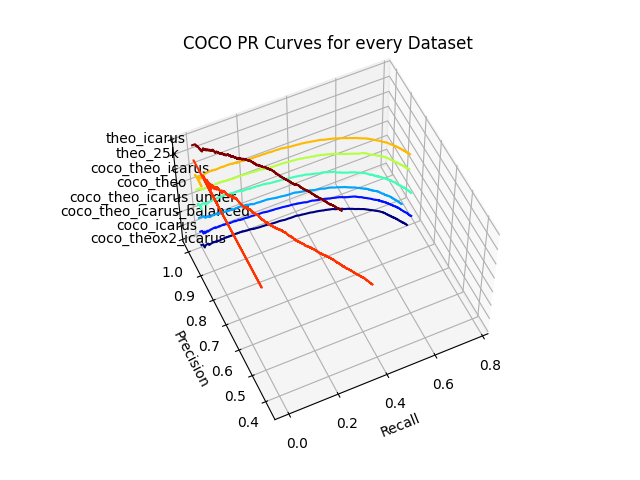

<IPython.core.display.Javascript object>


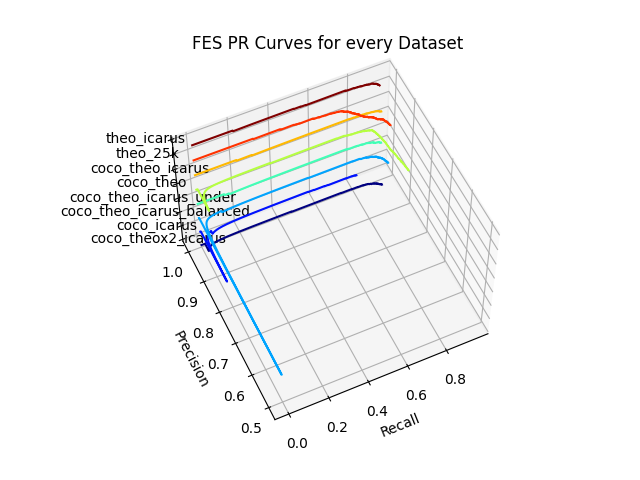

<IPython.core.display.Javascript object>


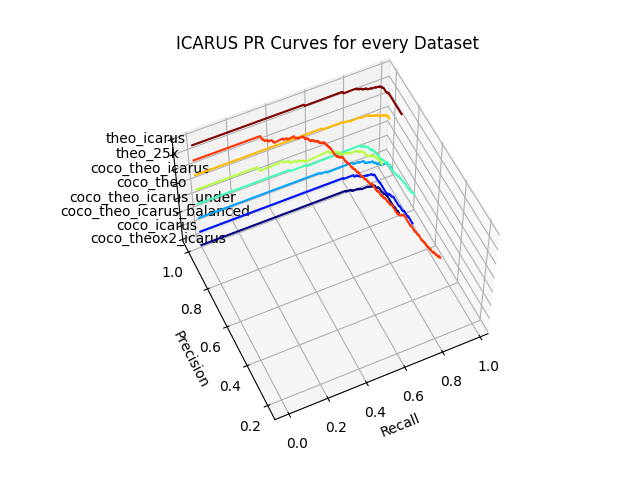

In [11]:
%matplotlib notebook
cmap = plt.get_cmap("jet", len(pr_keep["COCO"]))
for idx,sets in enumerate(datasets): 
    fig = plt.figure(idx)
    ax = fig.add_subplot(projection="3d")
    z_labels = []
    for i in range(len(pr_keep[sets])):
        ax.plot(re_keep[sets][i][0],pr_keep[sets][i][0], i ,color=cmap(i) ,label=f"Epoch {i}")
        ax.set_title(f"{sets} PR Curves for every Dataset")
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
#         ax.set_zlabel("Epochs")
        ax.set_zticks(np.arange(0,len(pr_keep[sets]),1))
        z_labels.append(pr_keep[sets][i][1])
        ax.view_init(55,-115)
    ax.set_zticklabels(z_labels)
# plt.tight_layout()
plt.grid()
plt.show()


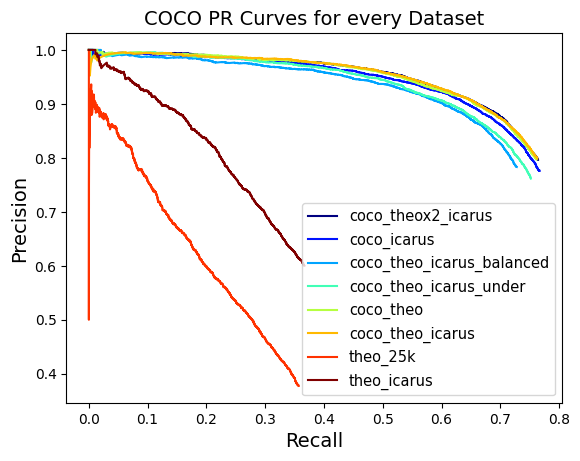

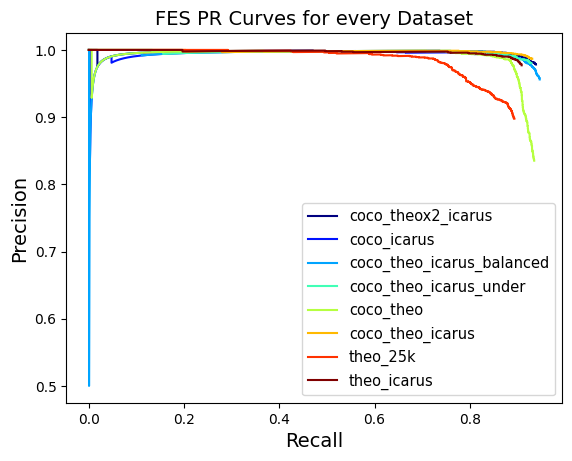

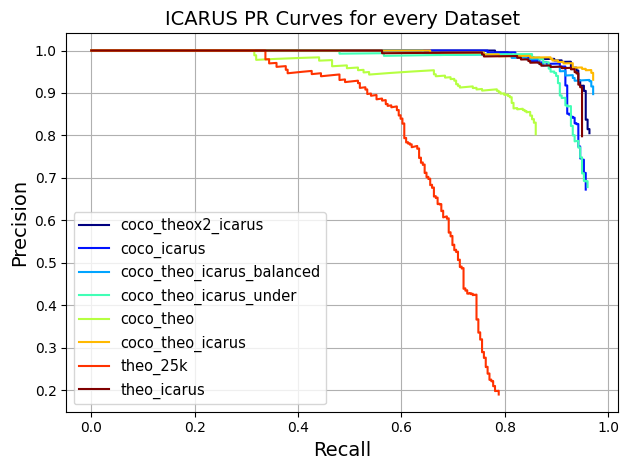

In [19]:
%matplotlib inline
cmap = plt.get_cmap("jet", len(pr_keep["COCO"]))
for idx,sets in enumerate(datasets):
    fig1 = plt.figure(idx)
    ax1 = fig1.add_subplot(1,1,1)
    z_labels = []
    for i in range(len(pr_keep[sets])):
        ax1.plot(re_keep[sets][i][0],pr_keep[sets][i][0],color=cmap(i), label=pr_keep[sets][i][1])
        ax1.set_title(f"{sets} PR Curves for every Dataset", fontsize=14)
        ax1.set_xlabel("Recall", fontsize=14)
        ax1.set_ylabel("Precision", fontsize=14)
        plt.legend(prop={'size':10.5})
        plt.savefig(f"{sets}_for_datasets", bbox_inches="tight")
plt.tight_layout()
plt.grid()
plt.show()